In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from math import sqrt

In [6]:
data = pd.read_csv("dataset.csv")

In [3]:
#Dataset info
print (data.shape)
print (data.columns)
print (data.head)
print (data.info())
print (data.describe())

(11055, 31)
Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port ', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')
<bound method NDFrame.head of        having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                     -1           1                   1                 1   
1                      1           1                   1                 1   
2                      1           0                   1                 1   
3                      1           0   

In [4]:
#Preprocessing
#1.Remove 'null/NA' values which exceeds our limt(5%)
nullData = data.isnull().sum()
print (nullData)
ppData1 = nullData[nullData>(0.05*len(data))]
print (ppData1)
data = data.drop(ppData1.index, axis=1)
#Preprocessed data(step1) info
print ('Data which removed null values')
print (data.shape)
print (data.columns)
print (data.head)
print (data.info())


having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

Correlation Vector
having_IP_Address              0.094160
URL_Length                     0.057430
Shortining_Service             0.067966
having_At_Symbol               0.052948
double_slash_redirecting       0.038608
Prefix_Suffix                  0.348606
having_Sub_Domain              0.298323
SSLfinal_State                 0.714741
Domain_registeration_length    0.225789
Favicon                        0.000280
port                           0.036419
HTTPS_token                    0.039854
Request_URL                    0.253372
URL_of_Anchor                  0.692935
Links_in_tags                  0.248229
SFH                            0.221419
Submitting_to_email            0.018249
Abnormal_URL                   0.060488
Redirect                       0.020113
on_mouseover                   0.041838
RightClick                     0.012653
popUpWidnow                    0.000086
Iframe                         0.003394
age_of_domain                  0.121496
DNSRecord            

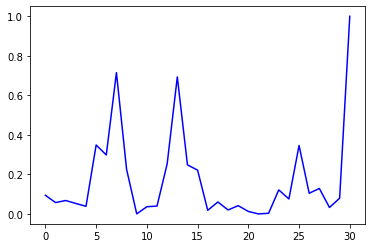

In [5]:
#2.Dropping Unwanted Coloumns[correlation not met threshold]
lab_col = 'Result'
d3 = data.select_dtypes(include=['integer','float']).corr()[lab_col].abs()
print ('Correlation Vector')
print (d3)
x = np.arange(d3.shape[0])
y = d3
plt.plot(x, y, color ="blue")
d3.to_csv("Corr_Vec.csv")
data = data.drop(d3[d3<0.1].index, axis=1)
#Preprocessed data(step2) info
print ('Data removed which correlation not met threshold values')
print (data.shape)
print (data.columns)
print (data.head)
print (data.info())

(11055, 12) Index(['Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'age_of_domain', 'web_traffic', 'Page_Rank',
       'Google_Index'],
      dtype='object')


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (12).

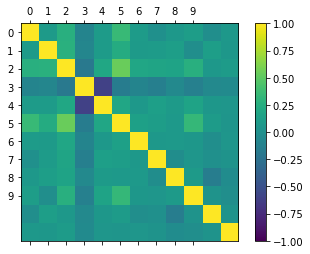

In [8]:
df = data

df = df.drop(["Result"], axis=1) 
print (df.shape,df.columns)

correlations = df.corr()
correlations = correlations.round(2)
correlations.to_csv('./corr_Mat.csv',index=False)
fig = plt.figure()
g = fig.add_subplot(111)
cax = g.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
g.set_xticks(ticks)
g.set_yticks(ticks)
g.set_xticklabels(list(df.columns))
g.set_yticklabels(list(df.columns))
plt.savefig('./corr_Mat.png')
plt.show()

upper = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(np.bool))
cols_to_drop = []
print(upper)
for i in upper.columns:
    if (any(upper[i] == -1) or any(upper[i] == -0.98) or any(upper[i] == -0.99) or any(upper[i] == 0.98) or any(upper[i] == 0.99) or any(upper[i] == 1)):
        cols_to_drop.append(i)
data = data.drop(cols_to_drop, axis=1) 
print ('Data removed which correlation not met threshold values')
print (data.shape)
print (data.columns)
print (data.head)
print (data.info())

SVM Result
Number of Prediction :  2764
Root Mean Squared Error :  0.5565034524775135
Accuracy :  0.9225759768451519
Confusion Matrix
[[1094  140]
 [  74 1456]]
              precision    recall  f1-score   support

          -1       0.94      0.89      0.91      1234
           1       0.91      0.95      0.93      1530

    accuracy                           0.92      2764
   macro avg       0.92      0.92      0.92      2764
weighted avg       0.92      0.92      0.92      2764



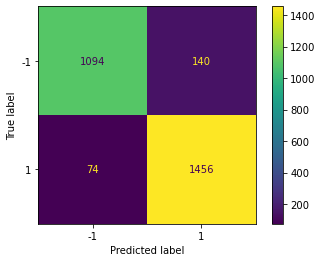

In [9]:
#SVM
X = data[list(data.columns)[:-1]]
y = data['Result']
x_train, x_test, y_train, y_test = tts(X,y)
ml_model = svm.SVC(kernel='linear', C=1.0)
ml_model.fit(x_train,y_train)
y_pred = ml_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
acc = ml_model.score(x_test, y_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("SVM Result")
print ("Number of Prediction : ", len(y_pred))
print ("Root Mean Squared Error : ", rmse)
print ("Accuracy : ", acc)
print ("Confusion Matrix")
print (cm)
summary = classification_report(y_test, y_pred)
plot_confusion_matrix(ml_model, x_test, y_test)
print(summary)

NB Result
Number of Prediction :  2764
Root Mean Squared Error :  1.2827475937575883
Accuracy :  0.5886396526772794
Confusion Matrix
[[1196    0]
 [1137  431]]
              precision    recall  f1-score   support

          -1       0.51      1.00      0.68      1196
           1       1.00      0.27      0.43      1568

    accuracy                           0.59      2764
   macro avg       0.76      0.64      0.55      2764
weighted avg       0.79      0.59      0.54      2764



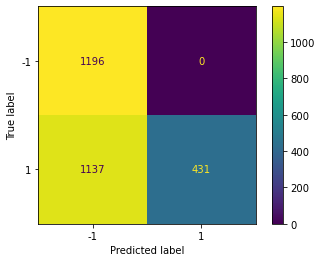

In [10]:
#NB
X = data[list(data.columns)[:-1]]
y = data['Result']
x_train, x_test, y_train, y_test = tts(X,y)
ml_model = GaussianNB()
ml_model.fit(X,y)
y_pred = ml_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
acc = ml_model.score(x_test, y_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("NB Result")
print ("Number of Prediction : ", len(y_pred))
print ("Root Mean Squared Error : ", rmse)
print ("Accuracy : ", acc)
print ("Confusion Matrix")
print (cm)
summary = classification_report(y_test, y_pred)
plot_confusion_matrix(ml_model, x_test, y_test)
print(summary)

CART/DT Result
Number of Prediction :  2764
Root Mean Squared Error :  0.33597601733718996
Accuracy :  0.9717800289435601
Confusion Matrix
[[1150   48]
 [  30 1536]]
              precision    recall  f1-score   support

          -1       0.97      0.96      0.97      1198
           1       0.97      0.98      0.98      1566

    accuracy                           0.97      2764
   macro avg       0.97      0.97      0.97      2764
weighted avg       0.97      0.97      0.97      2764



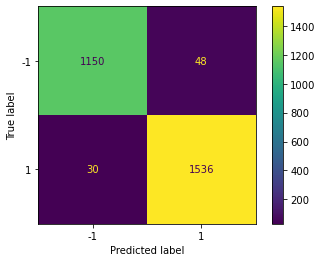

In [11]:
#CART
X = data[list(data.columns)[:-1]]
y = data['Result']
x_train, x_test, y_train, y_test = tts(X,y)
ml_model = DecisionTreeClassifier()
ml_model.fit(X,y)
y_pred = ml_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
acc = ml_model.score(x_test, y_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("CART/DT Result")
print ("Number of Prediction : ", len(y_pred))
print ("Root Mean Squared Error : ", rmse)
print ("Accuracy : ", acc)
print ("Confusion Matrix")
print (cm)
summary = classification_report(y_test, y_pred)
plot_confusion_matrix(ml_model, x_test, y_test)
print(summary)

LR Result
Number of Prediction :  2764
Root Mean Squared Error :  0.5769323536305637
Accuracy :  0.9167872648335745
Confusion Matrix
[[1097  140]
 [  90 1437]]
              precision    recall  f1-score   support

          -1       0.92      0.89      0.91      1237
           1       0.91      0.94      0.93      1527

    accuracy                           0.92      2764
   macro avg       0.92      0.91      0.92      2764
weighted avg       0.92      0.92      0.92      2764



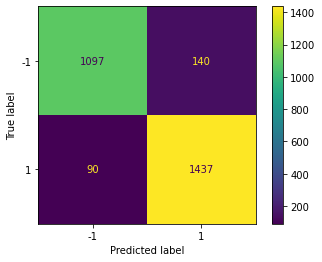

In [13]:
#LR
X = data[list(data.columns)[:-1]]
y = data['Result']
x_train, x_test, y_train, y_test = tts(X,y)
ml_model = LogisticRegression()
ml_model.fit(X,y)
y_pred = ml_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
acc = ml_model.score(x_test, y_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("LR Result")
print ("Number of Prediction : ", len(y_pred))
print ("Root Mean Squared Error : ", rmse)
print ("Accuracy : ", acc)
print ("Confusion Matrix")
print (cm)
summary = classification_report(y_test, y_pred)
plot_confusion_matrix(ml_model, x_test, y_test)
print(summary)